<div align="center">
    <img src='https://media-exp1.licdn.com/dms/image/C561BAQFV4oU27rzxaQ/company-background_10000/0/1562869489836?e=2147483647&v=beta&t=OMHL6Izxqw7r8S5fn9gDQM1hNMKgo3yqMlH1F3Iwm9o' style='height:300px;'>
</div>

# Análisis de fraudes con tarjeta de crédito

**Fecha de entrega:** 30/06/22

**Grupo:** fraud detection (2)

**Integrantes:**

Maria Mercedes Silva  
Agustin Trulli  
Ernesto Romero  

**Trabajo: Análisis y Curación de datos.**  

Como vimos en el práctico 1, nuestro dataset posee varias particularidades en torno a la forma y presentación de los datos. La mayor parte de las features son el resultado de aplicar PCA sobre el conjunto original, y esto hace que nos encontremos con un conjunto de varaibles relativamente "limpio".
El "problema" con nuestro dataset desde el punto de vista de la curación de datos es, entonces, que ya está bien curado y procesado.
Siendo este el contexto, el práctico apunta entonces a seguir preparando el dataset para el entrenamiento, atendiendo a estas características. Los objetivos van a ser los siguentes:

-Armar una matriz de correlación para visualizar de manera más clara la información de las features.  
-Obtener nuevas features a partir de la variable time.  
-Reescalar las variables que sean necesarias y desechar aquellas que no sean óptimas para el entrenamiento.  

-----

## 1. Carga de datos y exploración de la correlación entre datos.
Por lo visto en los prácticos de análisis y curación sabemos que PCA implica una reducción de dimensionalidad de la matriz original. Pero eso no quita que podamos analizar el dataset y visualizar las relaciones que hay enter las variables y el target. Exploremos un poco más dichas relaciones.


#### 1.1 Genere un gráfico que muestre una matriz de correlación entre las features.

In [94]:
#Librerias Usadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import numpy as np
import warnings
import time 
warnings.filterwarnings('ignore')


In [95]:
url1 = (r'https://raw.githubusercontent.com/p-eleuterio/card-fraud-detection-2022/main/dataset/fraud_data_pt1.csv')
df1 = pd.read_csv(url1)

In [96]:
url2 =(r'https://raw.githubusercontent.com/p-eleuterio/card-fraud-detection-2022/main/dataset/fraud_data_pt2.csv')
df2 = pd.read_csv(url2)

In [97]:
df = pd.concat([df1, df2], ignore_index=True)

In [98]:
df.head(3)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


> Matriz correlacion entre las columnas del dataset

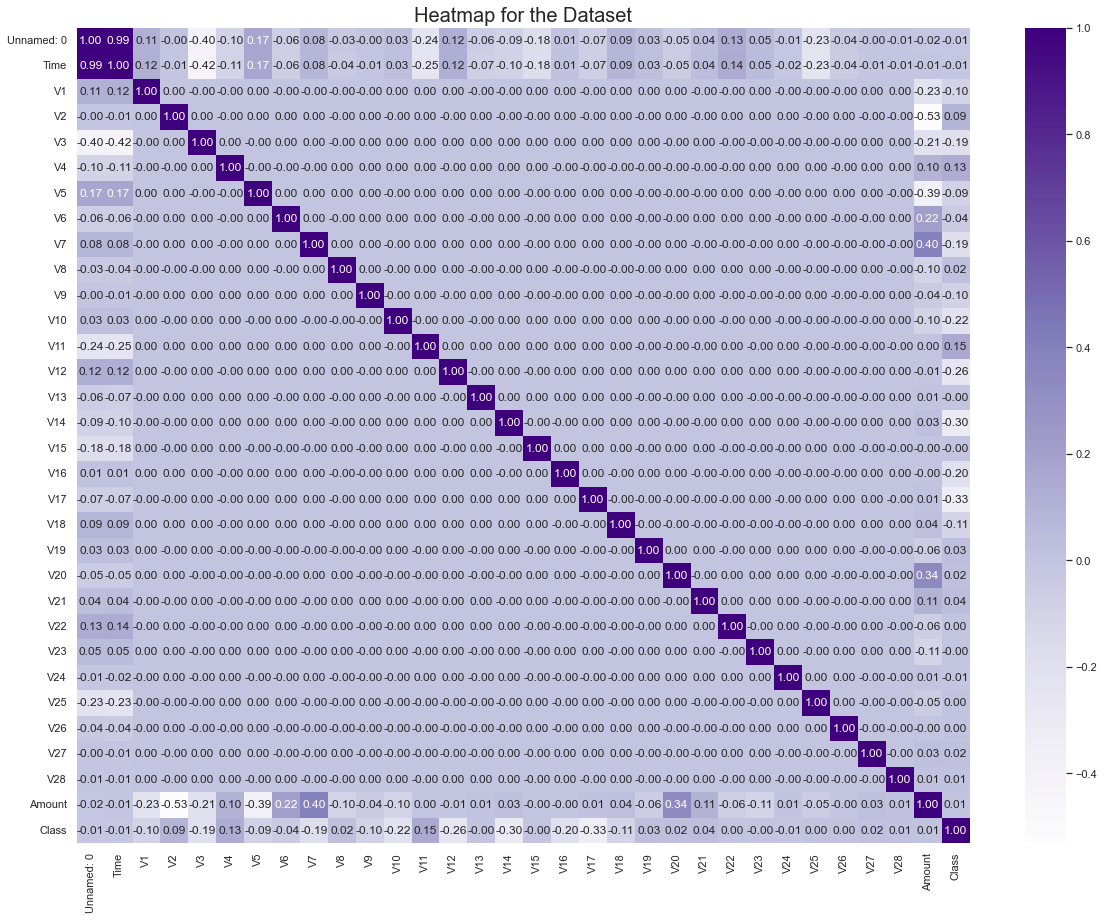

In [100]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = 'Purples')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

>Las variables que presentan una correlacion lineal mas significativa (por encima de +-0.30)en el dataset son:

    -v7 con respecto a Amount: 0.40
    -v20 con respecto a Amount: 0.34
    -v2 con respecto a Amount: -0.53
    -v5 con respecto a Amount: -0.39

    -v14 con repecto a Class: -0.30
    -v17 con respecto a Class: -0.33 
    
    -v3 con respecto a 'Unnamed:0' : -0.40
    
    -v3 con respecto a Time: -0.42

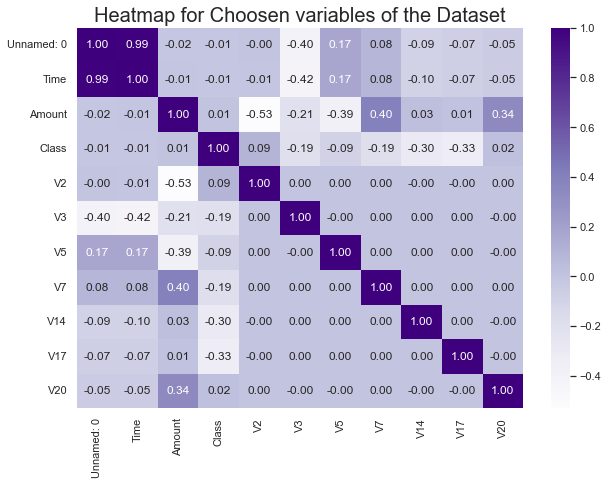

In [101]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.heatmap(df[['Unnamed: 0','Time','Amount','Class','V2','V3','V5','V7','V14','V17','V20']].corr(),\
            annot = True, fmt = ".2f", cmap = 'Purples')
plt.title('Heatmap for Choosen variables of the Dataset', fontsize = 20)
plt.show()

#### 1.2 Muestre a través de un pairplot la distribución de cada variable por separado utilizando histogramas procurando visualizar la distribución de ambas clases. A simplee vista, ¿cuáles variables parece "separar" mejor las dos clases?

In [102]:
df_amount_qualite = df.Amount.quantile(0.90)
df_amount_filtered = df[df.Amount < df_amount_qualite]
print(len(df_amount_filtered))

256324


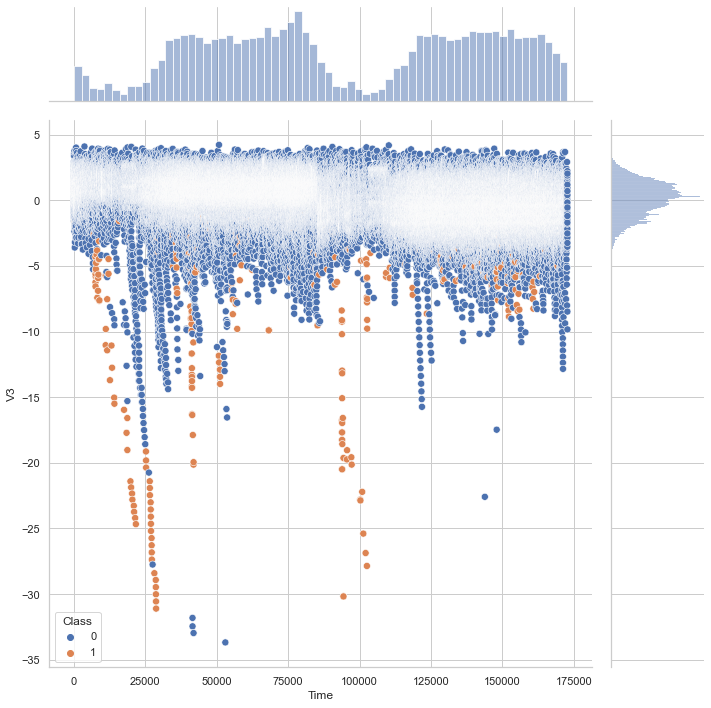

In [103]:
sns.set_style('whitegrid',{'axes.facecolor':'white'})
g = sns.JointGrid(data=df_amount_filtered, x='Time', y='V3',
                      height=10, hue='Class')
g.plot_joint(sns.scatterplot,s=50)
g.plot_marginals(sns.histplot);

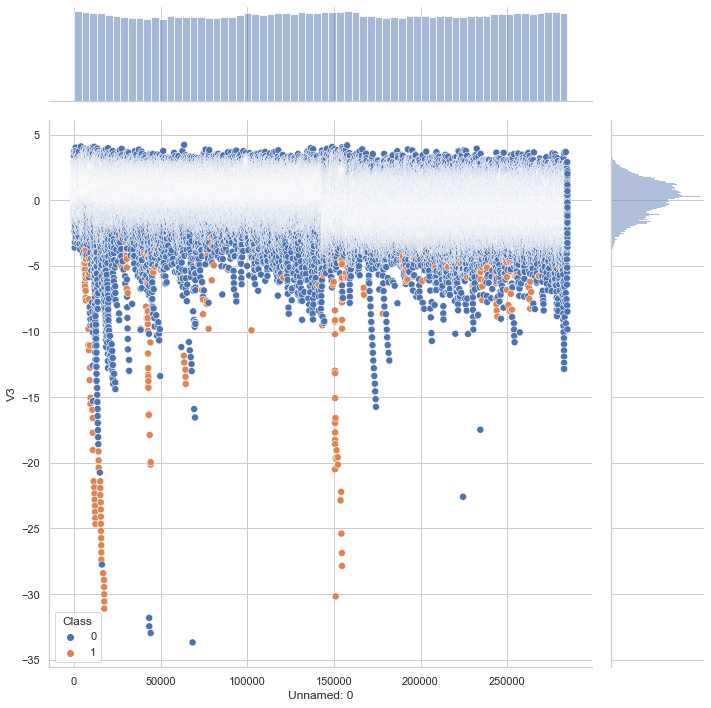

In [104]:
sns.set_style('whitegrid',{'axes.facecolor':'white'})
g = sns.JointGrid(data=df_amount_filtered, x='Unnamed: 0', y='V3',
                      height=10, hue='Class')
g.plot_joint(sns.scatterplot,s=50)
g.plot_marginals(sns.histplot);

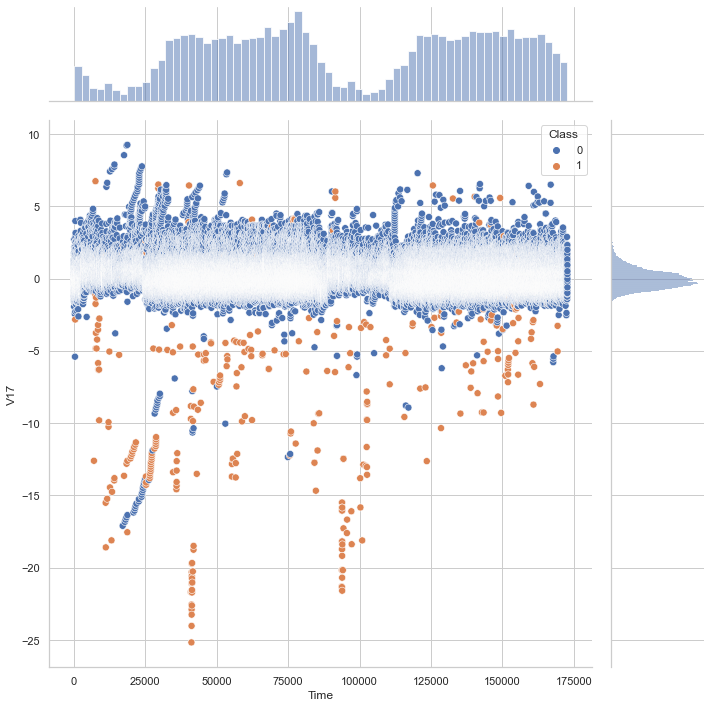

In [105]:
sns.set_style('whitegrid',{'axes.facecolor':'white'})
g = sns.JointGrid(data=df_amount_filtered, x='Time', y='V17',
                      height=10, hue='Class')
g.plot_joint(sns.scatterplot,s=50)
g.plot_marginals(sns.histplot);

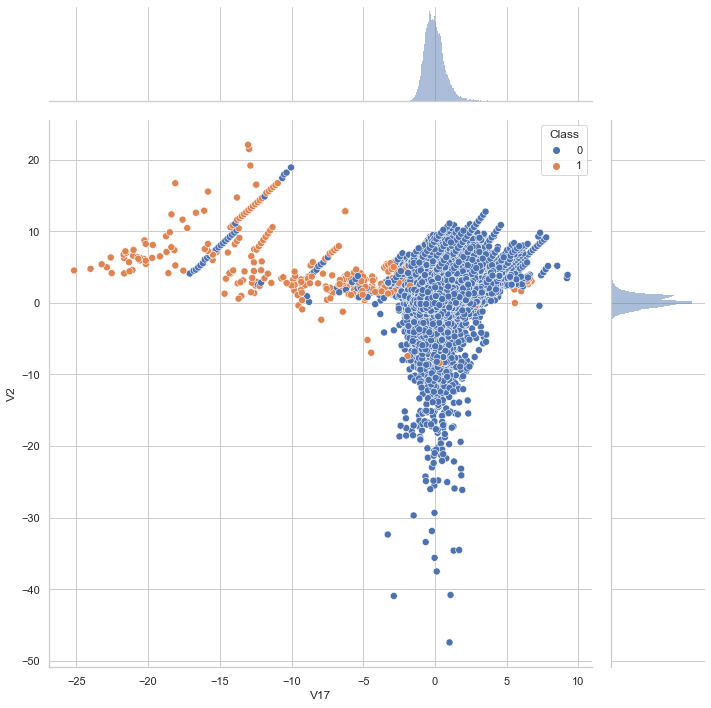

In [107]:
sns.set_style('whitegrid',{'axes.facecolor':'white'})
g = sns.JointGrid(data=df_amount_filtered, x='V17', y='V2',
                      height=10, hue='Class')
g.plot_joint(sns.scatterplot,s=50)
g.plot_marginals(sns.histplot);

> Basandonos en los pairplot realizados sobre algunas de las variables que presentaban mayor correlacion lineal podemos observar la apariciones de momentos de Tiempo donde se producen fraudes acumulados en un periodo de tiempo corto, lo que nos da a pensar que las operaciones fueron realizadas sistematicamente a partir de un primer fraude.
 
>Nos planteamos los siguiente: La periodicidad de los fraudes con respecto al Tiempo es un factor clave a la hora de detectar los mismos en los casos donde asumimos se suceden sistematicamente. 

>Por otro lado, en el ejemplo vemos que la V17 junto con la V2 parecen presentar una buena separacion de los datos por clases, siendo la V17 la variable mas determinante para separar a las demas. 

## 2. Generación de nuevas features.  

Ahora bien, esta es nuestra oportunidad de generar nuevas features y explorar las relacionees de las mismas con el target. Usando la variable time el objetivo es crear una nueva feature quee aporte información sobre posibles correlaciones latentes en la misma.

#### 2.1 Usando métodos a elección, generen una nueva variable que cuente la cantidad de eventos fraudulentos en la última hora a partir del pago. (Esto es, si en la última hora a partir del momento del pago ocurrieron 3 pagos fraudulentos, el valor de la variable para este pago debería ser 3).

>Generamos la feature **'last_hour_transactions'.**  
>Esta feature nos permite saber las cantidad de transacciones ocurridas de manera acumulativa por hora.

In [120]:
def acc_hour_1(df):
    print('Calculating the accumulate fraud cases in the last hour for {} payments.'.format(df.shape[0]))
    start = time.time()
    df_time = df.Time.to_numpy()
    df_filtered = df[['Time', 'Class']]
    response = [] 
    for t in df_time:
        df_t = df_filtered[(df_filtered.Time > (t -3600)) & (df_filtered.Time <= t)]
        if df_t.Class.value_counts()[0] == df_t.shape[0]:
            response.append(0)
        else:
            response.append(df_t.Class.value_counts()[1])
    end = time.time()
    print('Returning response. Elpased time:', end - start)
    return response

In [121]:
df['last_hour_transactions'] = acc_hour_1(df)

Calculating the accumulate fraud cases in the last hour for 284807 payments.
Returning response. Elpased time: 548.7953779697418


In [123]:
df.head(3)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,last_hour_transactions
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0


#### 2.2 Realice un gráfico de pairplot de esta variable como en el punto 1 con relación al target. ¿Observan alguna correlación?

In [89]:
#filtramos por la variable 'Class'
df_fraud_class = df[df.Class == 1]
df_no_fraud_class = df[df.Class == 0]

Distribucion de los fraudes de la nueva feature.

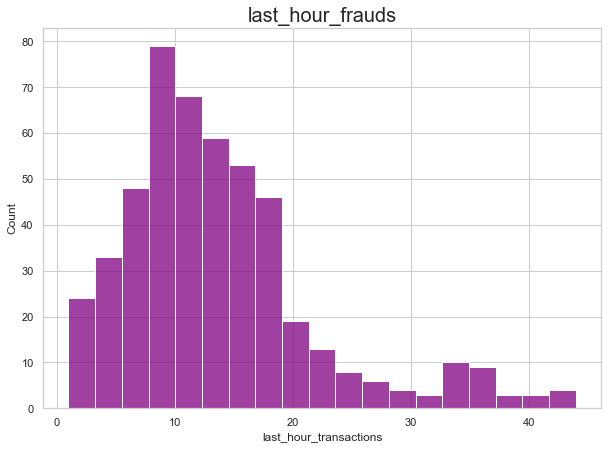

In [116]:
sns.histplot(df_fraud_class.last_hour_transactions,color='purple').set_title('last_hour_frauds',size=20);

In [113]:
n_samples = int(len(df_no_fraud_class)*0.05)
sample_two_cols = df_no_fraud_class[['last_hour_transactions', 'Amount']]
sample_df = sample_two_cols.sample(n_samples)

Conteo de eventos fraudulentos en la última hora a partir del pago.

In [122]:
df_fraud_class.last_hour_transactions.value_counts().head(10)

12    42
9     33
13    31
15    30
14    28
10    26
11    26
7     25
6     23
16    23
Name: last_hour_transactions, dtype: int64

In [91]:
print('Media de transacciones fraudulentas en la ultima hora: ',round(df_fraud_class['last_hour_transactions'].mean(),2))

Media de transacciones fraudulentas en la ultima hora:  13.78


In [92]:
print('Media de Transacciones NO fraudulentas en la ultima hora: ',round(df_no_fraud_class['last_hour_transactions'].mean(),2))

Media de Transacciones NO fraudulentas en la ultima hora:  10.56


La media de las transacciones fraudulentas en una hora es incluso mayor que la media de transacciones normales.

#### 2.3 Analicen la correlación de esta variable con el target con un método a elección. ¿Les parece que la variable puede ser de valor?

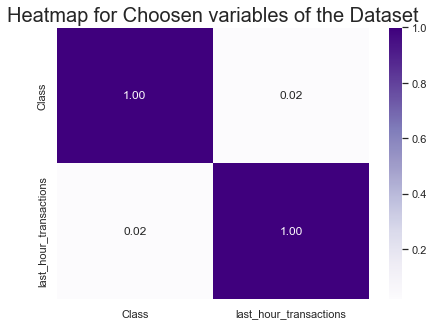

In [124]:
plt.rcParams['figure.figsize'] = (7, 5)
sns.heatmap(df[['Class','last_hour_transactions']].corr(),\
            annot = True, fmt = ".2f", cmap = 'Purples')
plt.title('Heatmap for Choosen variables of the Dataset', fontsize = 20)
plt.show()

El valor de esta nueva feature radica en la capacidad que nos brinda para observar la periodicidad de los fraudes en cortos periodos de tiempo.

## 3. Escalado de features.

Finalmente, para preparar nuestro dataset para el entrenamiento debemos considerar si la escala en la que se encuentran nuestras features es la óptima para trabajar copn distintos modelos o si tal vez sería deseable manejar valores en nuestras features que no sean problemáticos en ciertos escenarios de entrenamiento.

#### 3.1 La variable amount puede presentar una diferencia muy grande con las otras variables del conjunto con respecto al rango de distribución de los valores. Utilice alguna función de su elección para escalar esta variable atendiendo los rangos de valores de las otras features (1, -1)

>Decidimos usar El MinMAxScaler de la libreria Scikitlearn.  
>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
df['Amount'] = scaler.fit_transform(df[['Amount']])

#### 3.2 A la hora de entrenar, ¿es conveniente conservar la variable time? Analice este punto, de sus perspectivas al respecto y si decicen eliminarla, escriban la función con la cual lo harían.

>**Time:** almacena el momento temporal en el que fue efectuada una compra, comenzando en cero cuando se hizo la primera compra. Es una distribución en la cual se aprecian 2 ciclos de bajas y altas en la frecuencia de las transacciones. 


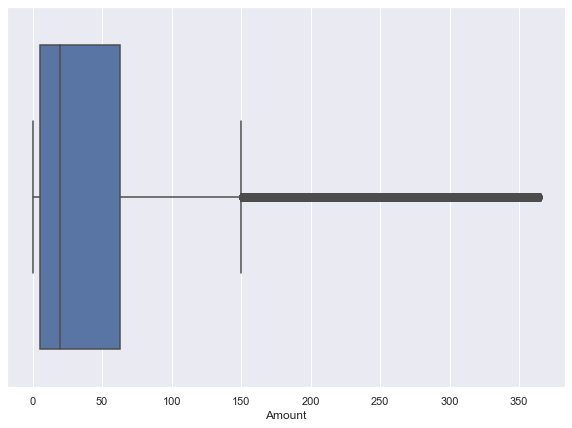

In [45]:
df_amount_qualite = df.Amount.quantile(0.95)
df_amount_q_09 = df[df.Amount < df_amount_qualite]
sns.boxplot(df_amount_q_09.Amount);

In [47]:
df_amount_q_09.Time.describe()

count    270565.000000
mean      94899.121549
std       47532.618370
min           0.000000
25%       54347.000000
50%       84856.000000
75%      139436.000000
max      172792.000000
Name: Time, dtype: float64

>La variable del Time como vimos anteriormente presenta una notable correlacion lineal con muchas de las otras variables.
Por este motivo decidimos conservarla y a demas utilizarla para generar nuevas features.

>Es bien sabido que a veces es necesaria la busqueda de nuevas features para mejorar el rendimiento de los modelos. Dado que Time es una variable que se correlaciona muy bien con la mayoria del dataset.

<center><h1 style='font-size:35px'>Conclusiones</h1></center>

> Basandonos en un analisis de las medias de fraudes por hora, con la nueva feature, observamos que los fraudes se suceden en porciones menores de tiempo que las transacciones normales. Esto demuestra el potencial uso de esta nueva feature para futuro entrenamiento de los datos.

>La media de las transacciones fraudulentas en una hora es incluso mayor que la media de transacciones normales.

> La variable que mas correlacion presenta con respecto al resto es la variable de Tiempo. Por este motivo tambien es que es la mejor para generar nuevas features.
